<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Clustering-Approach-to-High-Dimensional-Data/blob/main/Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction :
In this notebook, we aim to evaluate the effectiveness of various classification models in validating and testing the quality of clustering techniques. The primary objective is to determine which classification model provides the most reliable performance metrics.

To achieve this, we explore a diverse set of classification algorithms, including:
**Decision Tree Classifier**,
 **Random Forest**
  **Classifier**,
  **XGBoost**,
  **Gaussian Naive Bayes**,
  and **K-Nearest** Neighbors.
Each of these models is trained on the dataset with labeled clusters and evaluated based on key performance metrics such as Accuracy, F1 Score, and Precision.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [3]:
df=pd.read_csv('client_with_clusters.csv')

In [4]:
df.head()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y,Cluster,Clusters,Spectral_Cluster,Kmedoids_Cluster
0,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553,3,0,4,2
1,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553,0,0,4,2
2,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460,0,0,0,2
3,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460,0,0,3,3
4,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460,0,0,1,3


In [5]:
X = df.drop(['Cluster','Clusters','Spectral_Cluster','Kmedoids_Cluster'], axis=1)
y_k = df['Cluster']
y_C= df['Clusters']
y_SC= df['Spectral_Cluster']
y_km= df['Kmedoids_Cluster']


# Testing the K_means

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_k, test_size=0.2, random_state=42)

# Initialize a results dictionary to store metrics for each model
results_kMeans = {}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"{model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 30)

    # Store metrics
    results_kMeans[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Precision": precision}


In [7]:
# Decision Tree Classifier
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "Decision Tree Classifier")

Decision Tree Classifier
Accuracy: 0.93
F1 Score: 0.93
Precision: 0.93
------------------------------


In [8]:
# Random Forest Classifier
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest Classifier")

Random Forest Classifier
Accuracy: 0.96
F1 Score: 0.96
Precision: 0.96
------------------------------


In [9]:
# XGBoost Classifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X_train, X_test, y_train, y_test, "XGBoost Classifier")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
------------------------------


In [10]:
# Gaussian Naive Bayes
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")

Gaussian Naive Bayes
Accuracy: 0.90
F1 Score: 0.90
Precision: 0.91
------------------------------


In [11]:
# K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
------------------------------


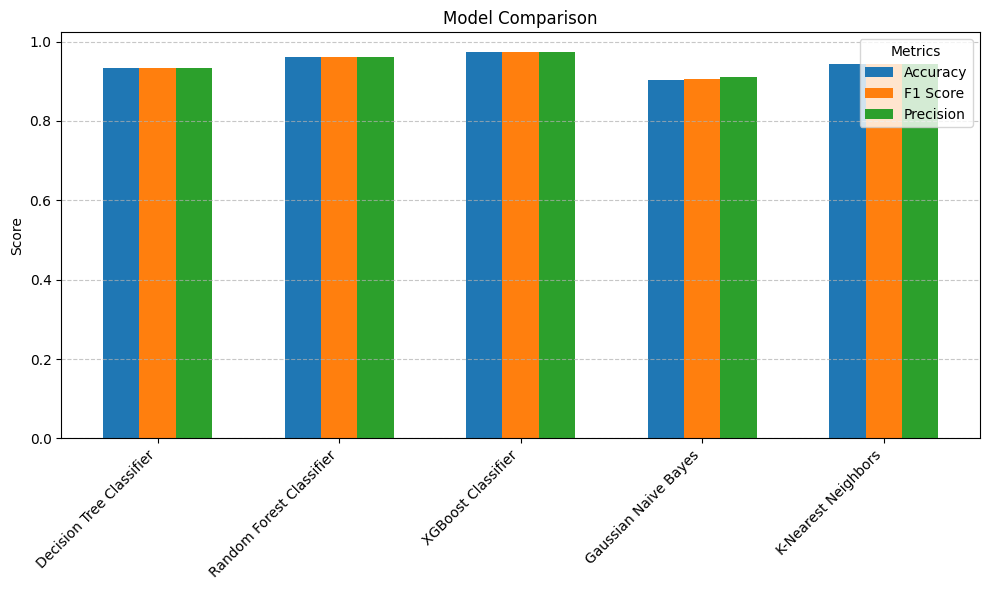

In [13]:
def plot_results(results):
    # Extract model names and metrics
    models = list(results.keys())
    metrics = list(results[models[0]].keys())  # "Accuracy", "F1 Score", "Precision"

    # Create a 2D array of metric values for plotting
    metric_values = np.array([[results[model][metric] for metric in metrics] for model in models])

    # Define bar width and positions
    bar_width = 0.2
    x = np.arange(len(models))  # Base x locations

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * bar_width, metric_values[:, i], bar_width, label=metric)

    # Add labels and title
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel("Score")
    ax.set_title("Model Comparison")
    ax.legend(title="Metrics")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(results_kMeans)

# Testing Fuzzy C_Mean

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_C, test_size=0.2, random_state=42)

# Initialize a results dictionary to store metrics for each model
results_Cmeans = {}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"{model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 30)

    # Store metrics
    results_Cmeans[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Precision": precision}


In [15]:
# Decision Tree Classifier
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "Decision Tree Classifier")

Decision Tree Classifier
Accuracy: 0.93
F1 Score: 0.93
Precision: 0.93
------------------------------


In [16]:
# Random Forest Classifier
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest Classifier")

Random Forest Classifier
Accuracy: 0.96
F1 Score: 0.96
Precision: 0.96
------------------------------


In [17]:
# XGBoost Classifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X_train, X_test, y_train, y_test, "XGBoost Classifier")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:21:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
------------------------------


In [18]:
# Gaussian Naive Bayes
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")

Gaussian Naive Bayes
Accuracy: 0.87
F1 Score: 0.87
Precision: 0.89
------------------------------


In [19]:
# K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
------------------------------


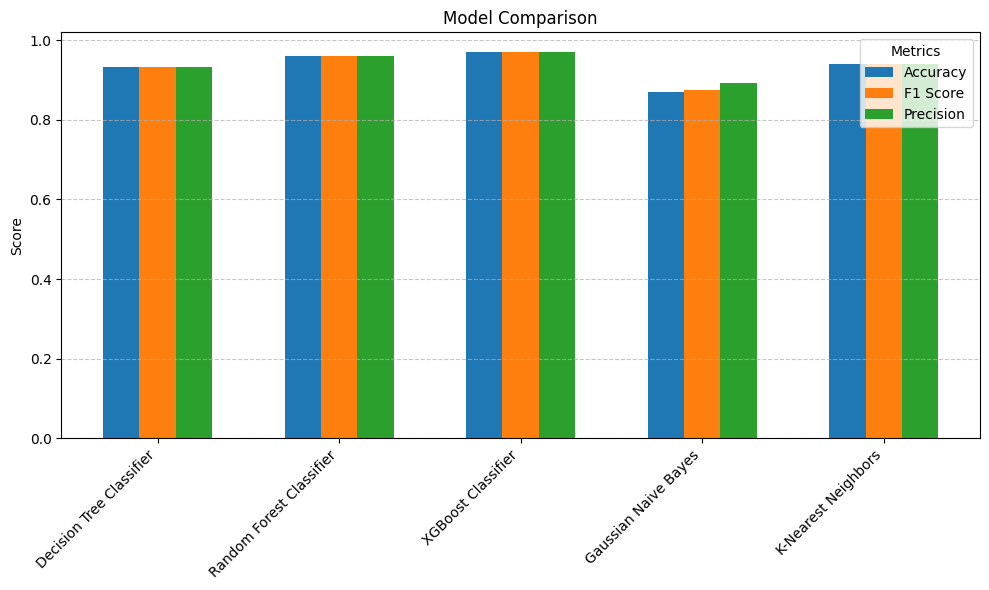

In [21]:
def plot_results(results):
    # Extract model names and metrics
    models = list(results.keys())
    metrics = list(results[models[0]].keys())  # "Accuracy", "F1 Score", "Precision"

    # Create a 2D array of metric values for plotting
    metric_values = np.array([[results[model][metric] for metric in metrics] for model in models])

    # Define bar width and positions
    bar_width = 0.2
    x = np.arange(len(models))  # Base x locations

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * bar_width, metric_values[:, i], bar_width, label=metric)

    # Add labels and title
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel("Score")
    ax.set_title("Model Comparison")
    ax.legend(title="Metrics")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(results_Cmeans)

# Testing Spectral Clustering

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_SC, test_size=0.2, random_state=42)

# Initialize a results dictionary to store metrics for each model
results_SC = {}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"{model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 30)

    # Store metrics
    results_SC[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Precision": precision}


In [25]:
# Decision Tree Classifier
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "Decision Tree Classifier")

Decision Tree Classifier
Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
------------------------------


In [26]:
# Random Forest Classifier
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest Classifier")

Random Forest Classifier
Accuracy: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


In [27]:
# XGBoost Classifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X_train, X_test, y_train, y_test, "XGBoost Classifier")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


In [28]:
# Gaussian Naive Bayes
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")

Gaussian Naive Bayes
Accuracy: 0.78
F1 Score: 0.78
Precision: 0.83
------------------------------


In [29]:
# K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors
Accuracy: 0.99
F1 Score: 0.99
Precision: 0.99
------------------------------


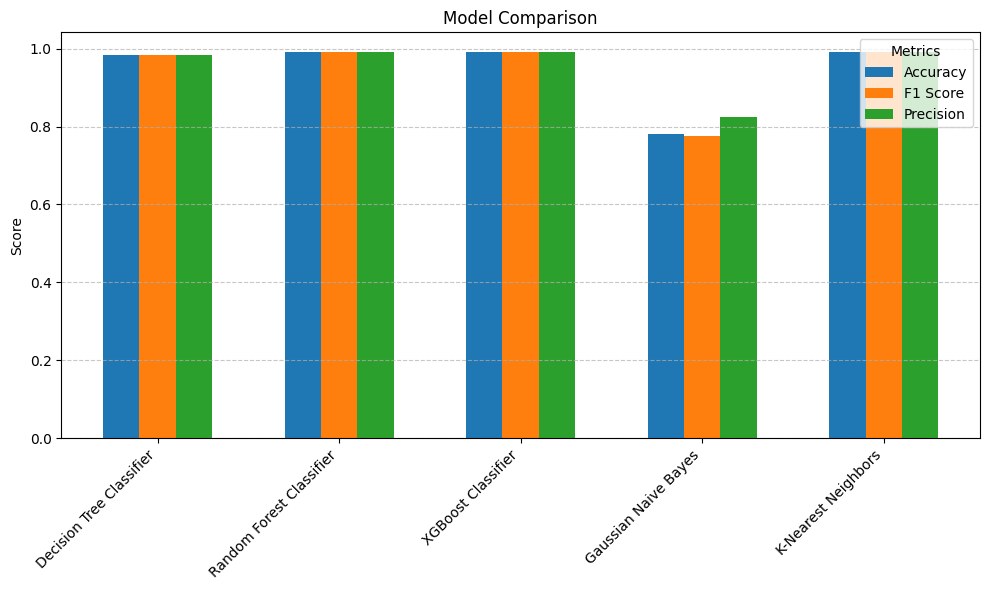

In [30]:
def plot_results(results):
    # Extract model names and metrics
    models = list(results.keys())
    metrics = list(results[models[0]].keys())  # "Accuracy", "F1 Score", "Precision"

    # Create a 2D array of metric values for plotting
    metric_values = np.array([[results[model][metric] for metric in metrics] for model in models])

    # Define bar width and positions
    bar_width = 0.2
    x = np.arange(len(models))  # Base x locations

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * bar_width, metric_values[:, i], bar_width, label=metric)

    # Add labels and title
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel("Score")
    ax.set_title("Model Comparison")
    ax.legend(title="Metrics")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(results_SC)

# Testing K-Medoids

In [31]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_km, test_size=0.2, random_state=42)

# Initialize a results dictionary to store metrics for each model
results_km = {}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"{model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 30)

    # Store metrics
    results_km[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Precision": precision}


In [32]:
# Decision Tree Classifier
evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, "Decision Tree Classifier")

Decision Tree Classifier
Accuracy: 0.93
F1 Score: 0.93
Precision: 0.93
------------------------------


In [33]:
# Random Forest Classifier
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest Classifier")

Random Forest Classifier
Accuracy: 0.95
F1 Score: 0.95
Precision: 0.95
------------------------------


In [34]:
# XGBoost Classifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), X_train, X_test, y_train, y_test, "XGBoost Classifier")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.97
F1 Score: 0.97
Precision: 0.97
------------------------------


In [35]:
# Gaussian Naive Bayes
evaluate_model(GaussianNB(), X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")

Gaussian Naive Bayes
Accuracy: 0.87
F1 Score: 0.87
Precision: 0.87
------------------------------


In [36]:
# K-Nearest Neighbors
evaluate_model(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors
Accuracy: 0.92
F1 Score: 0.92
Precision: 0.92
------------------------------


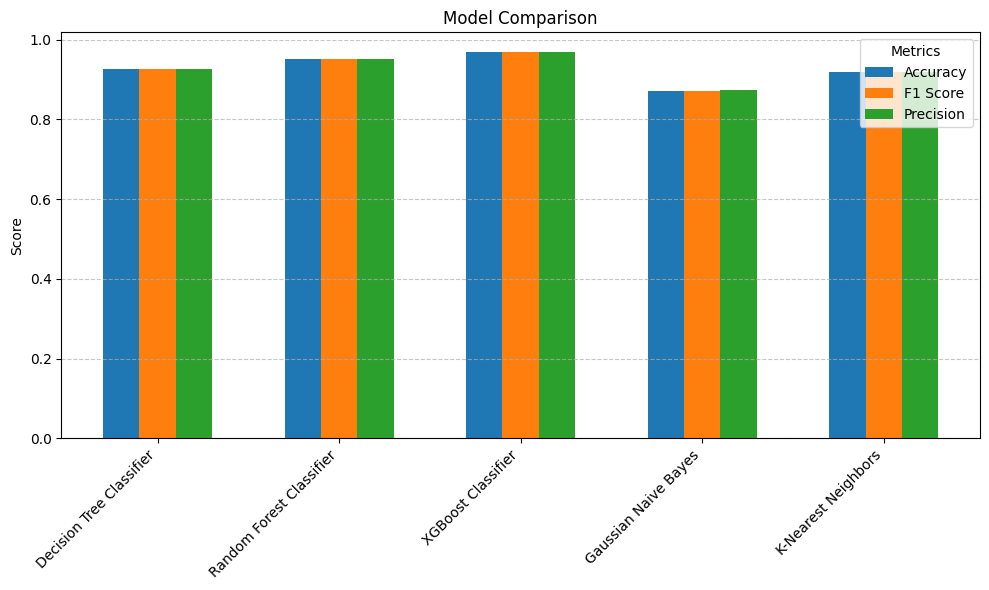

In [37]:
def plot_results(results):
    # Extract model names and metrics
    models = list(results.keys())
    metrics = list(results[models[0]].keys())  # "Accuracy", "F1 Score", "Precision"

    # Create a 2D array of metric values for plotting
    metric_values = np.array([[results[model][metric] for metric in metrics] for model in models])

    # Define bar width and positions
    bar_width = 0.2
    x = np.arange(len(models))  # Base x locations

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * bar_width, metric_values[:, i], bar_width, label=metric)

    # Add labels and title
    ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylabel("Score")
    ax.set_title("Model Comparison")
    ax.legend(title="Metrics")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(results_km)

In [38]:
print(results_km)

{'Decision Tree Classifier': {'Accuracy': 0.9273425755804242, 'F1 Score': 0.9273192256838401, 'Precision': 0.9273575214552875}, 'Random Forest Classifier': {'Accuracy': 0.9518957741773844, 'F1 Score': 0.9518074154592073, 'Precision': 0.9518888993859349}, 'XGBoost Classifier': {'Accuracy': 0.9696008017370971, 'F1 Score': 0.9695672951958506, 'Precision': 0.9695589324848631}, 'Gaussian Naive Bayes': {'Accuracy': 0.8710539502254886, 'F1 Score': 0.8722413973214168, 'Precision': 0.8743762019146178}, 'K-Nearest Neighbors': {'Accuracy': 0.9183230332386838, 'F1 Score': 0.9175593635720176, 'Precision': 0.9180213832562499}}


# Comparision

**Comparing the DTC Results**

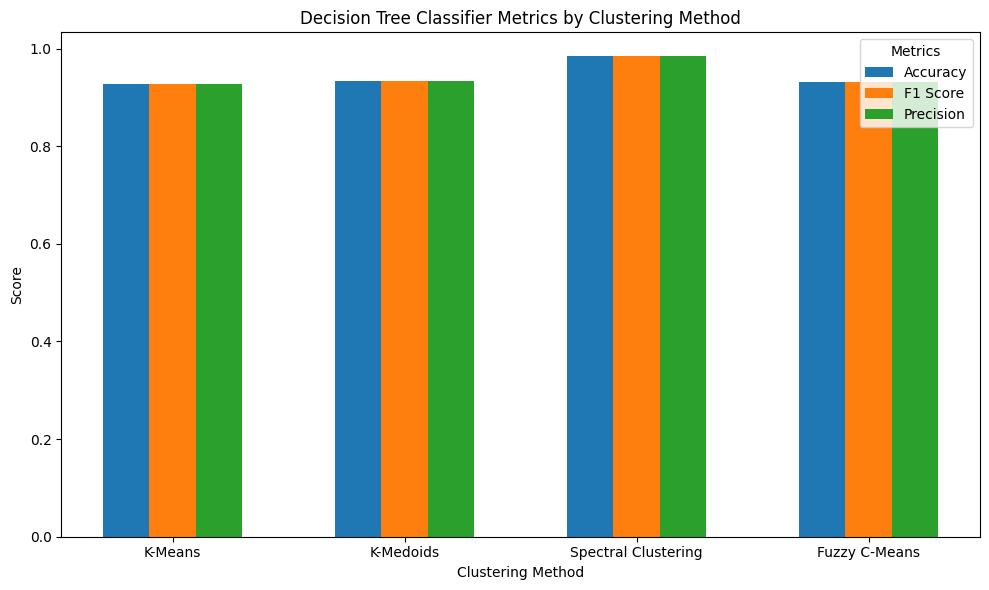

In [40]:
# Organize the results
methods = ["K-Means", "K-Medoids", "Spectral Clustering", "Fuzzy C-Means"]
results_dict = {
    "K-Means": results_km["Decision Tree Classifier"],
    "K-Medoids": results_kMeans["Decision Tree Classifier"],
    "Spectral Clustering": results_SC["Decision Tree Classifier"],
    "Fuzzy C-Means": results_Cmeans["Decision Tree Classifier"],
}

# Extract metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision"]
values = {metric: [results_dict[method][metric] for method in methods] for metric in metrics}

# Plotting the bars for Decision Tree Classifier
x = np.arange(len(methods))  # X positions for clustering methods
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Score")
ax.set_title("Decision Tree Classifier Metrics by Clustering Method")
ax.set_xticks(x + width)
ax.set_xticklabels(methods)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

**Comparing the RFC Results**

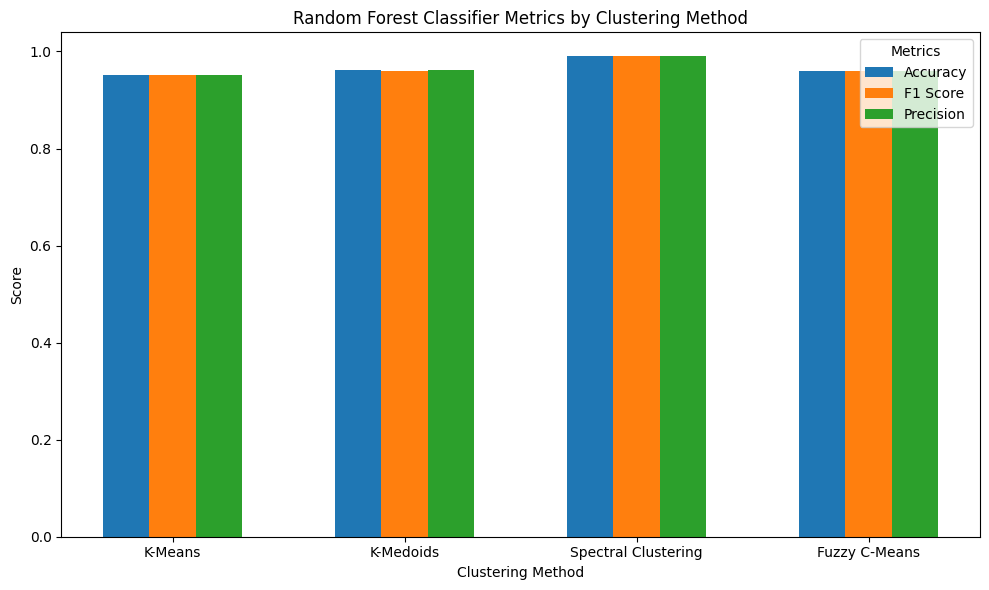

In [41]:
# Organize the results
methods = ["K-Means", "K-Medoids", "Spectral Clustering", "Fuzzy C-Means"]
results_dict = {
    "K-Means": results_km["Random Forest Classifier"],
    "K-Medoids": results_kMeans["Random Forest Classifier"],
    "Spectral Clustering": results_SC["Random Forest Classifier"],
    "Fuzzy C-Means": results_Cmeans["Random Forest Classifier"],
}

# Extract metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision"]
values = {metric: [results_dict[method][metric] for method in methods] for metric in metrics}

# Plotting the bars for Decision Tree Classifier
x = np.arange(len(methods))  # X positions for clustering methods
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Score")
ax.set_title("Random Forest Classifier Metrics by Clustering Method")
ax.set_xticks(x + width)
ax.set_xticklabels(methods)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

**Comparing the XGBoost Results**

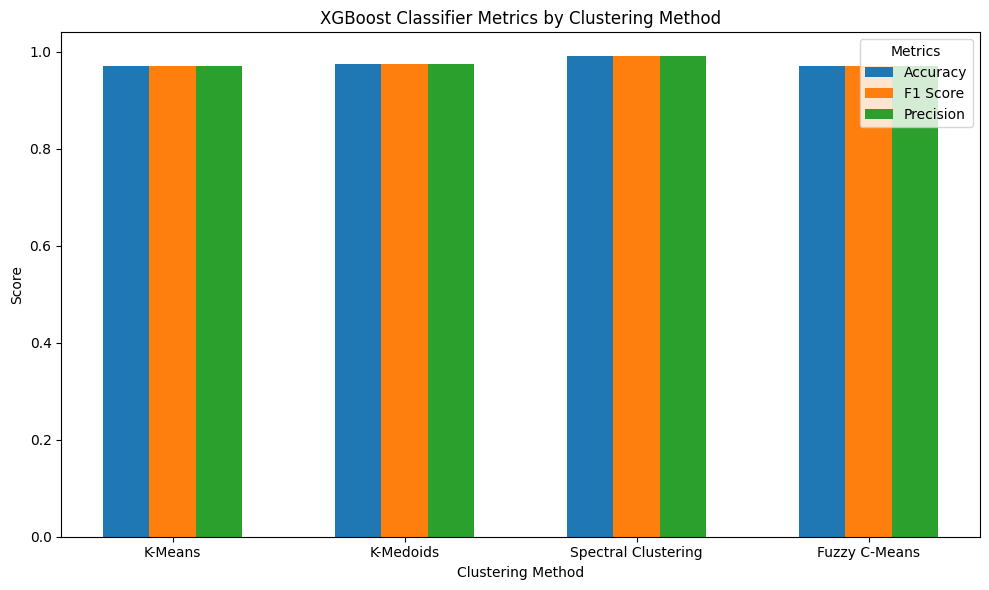

In [42]:
# Organize the results
methods = ["K-Means", "K-Medoids", "Spectral Clustering", "Fuzzy C-Means"]
results_dict = {
    "K-Means": results_km["XGBoost Classifier"],
    "K-Medoids": results_kMeans["XGBoost Classifier"],
    "Spectral Clustering": results_SC["XGBoost Classifier"],
    "Fuzzy C-Means": results_Cmeans["XGBoost Classifier"],
}

# Extract metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision"]
values = {metric: [results_dict[method][metric] for method in methods] for metric in metrics}

# Plotting the bars for Decision Tree Classifier
x = np.arange(len(methods))  # X positions for clustering methods
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Score")
ax.set_title("XGBoost Classifier Metrics by Clustering Method")
ax.set_xticks(x + width)
ax.set_xticklabels(methods)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

**Comparing the GNB Results**

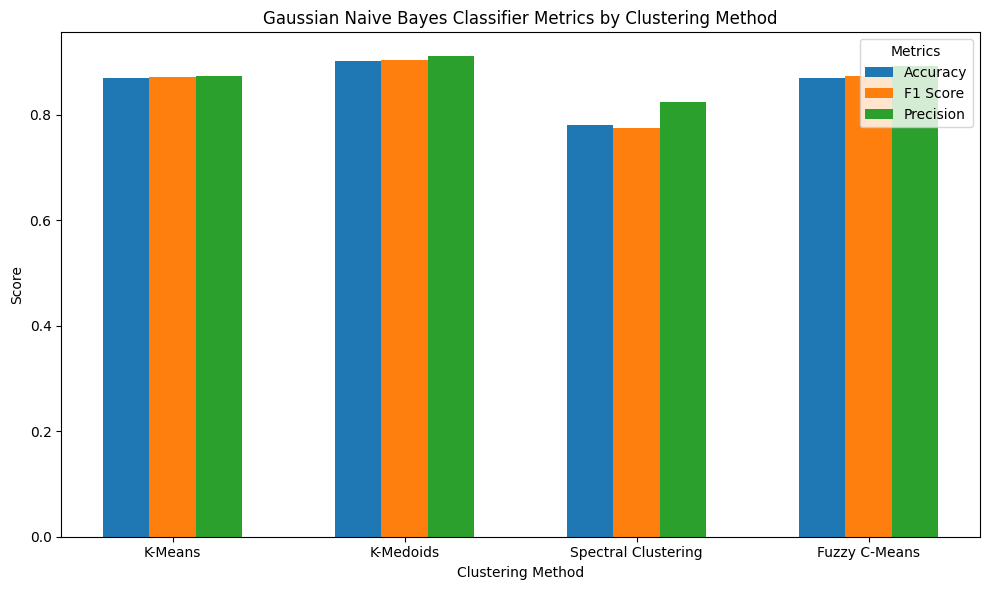

In [43]:
# Organize the results
methods = ["K-Means", "K-Medoids", "Spectral Clustering", "Fuzzy C-Means"]
results_dict = {
    "K-Means": results_km["Gaussian Naive Bayes"],
    "K-Medoids": results_kMeans["Gaussian Naive Bayes"],
    "Spectral Clustering": results_SC["Gaussian Naive Bayes"],
    "Fuzzy C-Means": results_Cmeans["Gaussian Naive Bayes"],
}

# Extract metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision"]
values = {metric: [results_dict[method][metric] for method in methods] for metric in metrics}

# Plotting the bars for Decision Tree Classifier
x = np.arange(len(methods))  # X positions for clustering methods
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Score")
ax.set_title("Gaussian Naive Bayes Classifier Metrics by Clustering Method")
ax.set_xticks(x + width)
ax.set_xticklabels(methods)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

**Comparing the KNN Results**

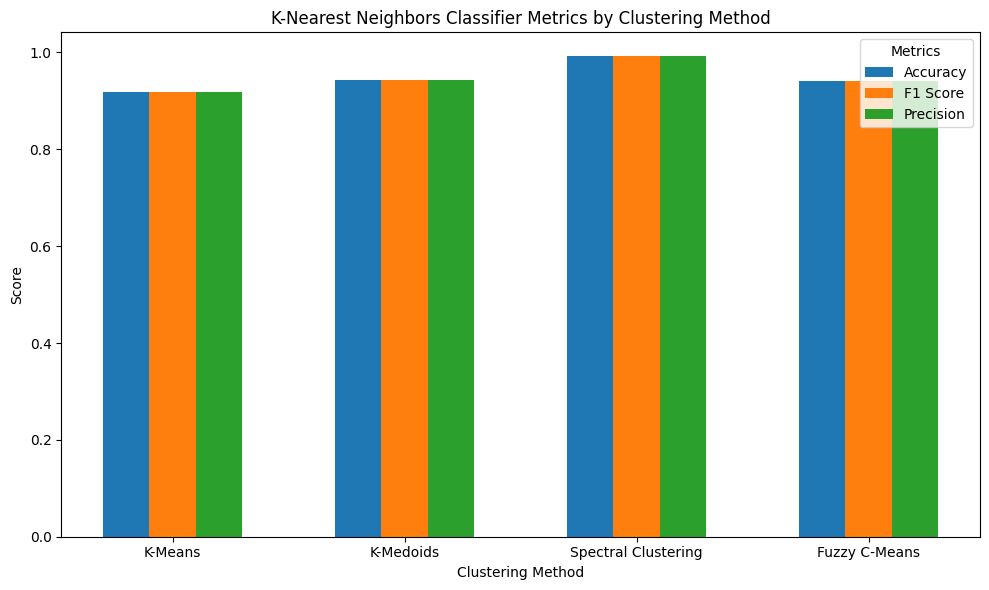

In [44]:
# Organize the results
methods = ["K-Means", "K-Medoids", "Spectral Clustering", "Fuzzy C-Means"]
results_dict = {
    "K-Means": results_km["K-Nearest Neighbors"],
    "K-Medoids": results_kMeans["K-Nearest Neighbors"],
    "Spectral Clustering": results_SC["K-Nearest Neighbors"],
    "Fuzzy C-Means": results_Cmeans["K-Nearest Neighbors"],
}

# Extract metrics and their values
metrics = ["Accuracy", "F1 Score", "Precision"]
values = {metric: [results_dict[method][metric] for method in methods] for metric in metrics}

# Plotting the bars for Decision Tree Classifier
x = np.arange(len(methods))  # X positions for clustering methods
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

# Add labels, title, and legend
ax.set_xlabel("Clustering Method")
ax.set_ylabel("Score")
ax.set_title("K-Nearest Neighbors Classifier Metrics by Clustering Method")
ax.set_xticks(x + width)
ax.set_xticklabels(methods)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

# Conclusion
Among the clustering methods tested, **Spectral Clustering** consistently demonstrated the best performance across the different classification algorithms.

When paired with models such as Logistic Regression, Random Forest Classifier, XGBoost, and others, Spectral Clustering achieved superior metrics in terms of Accuracy, F1 Score, and Precision. This indicates that the groups formed by Spectral Clustering exhibit ***strong separability and coherence, making it highly effective for downstream classification tasks.***

The results underline the strength of Spectral Clustering in handling complex datasets where traditional clustering methods may struggle. Its ability to leverage graph-based representations of the data allows it to capture intricate relationships between data points, leading to clusters that align well with the underlying structure of the dataset.

This analysis not only highlights Spectral Clustering as the most robust technique in this context but also emphasizes the importance of testing clustering methods through a combination of classification models. By validating clustering techniques with classification, we gain a deeper understanding of their real-world applicability and effectiveness.

In conclusion, Spectral Clustering proves to be a highly reliable technique, reinforcing its value in scenarios where accurate grouping and subsequent classification are critical.